In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
import seaborn as sns
import earthpy as et
import earthpy.plot as ep
import rasterio 
sns.set(font_scale=1.5, style="white")


In [2]:
#Create function to transform temperature
def calculate_lst(input_raster):
    kelvin = (input_raster * 0.00341802) + 142
    celsius = kelvin - 273.15
    return celsius




In [53]:

# Specify the shapefile path
shapefile = 'data/Adam22geb.shp'

# Read the shapefile using geopandas
shapefile_data = gpd.read_file(shapefile)

# Get the CRS of the shapefile
shapefile_crs = shapefile_data.crs

# List of raster file paths
raster_files = ['data/lst2018.tif',
                'data/lst2019.tif',
                'data/lst2020.tif',
                'data/lst202106.tif',
                'data/lst202107.tif',
                'data/lst2022.tif']

# Iterate over the raster files
for raster_file in raster_files:

    # Open the raster file as an xarray DataArray
    raster_data = rxr.open_rasterio(raster_file, masked = True).squeeze()

    #Transform original raster value to Celcius
    raster_data = calculate_lst(raster_data)

    
    reprojected_data = raster_data.rio.reproject(shapefile_crs)

    
    cropped_data = reprojected_data.rio.clip(shapefile_data.geometry)

    # Save the cropped raster to a new file
    cropped_file = raster_file.replace('.tif', '_cropped.tif')
    cropped_data.rio.to_raster(cropped_file)
     
    print(f"Dimensions of {cropped_file}: {cropped_data.shape}") 
    print(f"Cropped raster saved to: {cropped_file}")



/home/mitch182/.local/lib/python3.8/site-packages/rioxarray/raster_writer.py:132: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


Dimensions of data/lst2018_cropped.tif: (567, 771)
Cropped raster saved to: data/lst2018_cropped.tif


/home/mitch182/.local/lib/python3.8/site-packages/rioxarray/raster_writer.py:132: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


Dimensions of data/lst2019_cropped.tif: (567, 771)
Cropped raster saved to: data/lst2019_cropped.tif


/home/mitch182/.local/lib/python3.8/site-packages/rioxarray/raster_writer.py:132: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


Dimensions of data/lst2020_cropped.tif: (567, 770)
Cropped raster saved to: data/lst2020_cropped.tif


/home/mitch182/.local/lib/python3.8/site-packages/rioxarray/raster_writer.py:132: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


Dimensions of data/lst202106_cropped.tif: (567, 770)
Cropped raster saved to: data/lst202106_cropped.tif


/home/mitch182/.local/lib/python3.8/site-packages/rioxarray/raster_writer.py:132: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


Dimensions of data/lst202107_cropped.tif: (567, 771)
Cropped raster saved to: data/lst202107_cropped.tif
Dimensions of data/lst2022_cropped.tif: (567, 770)
Cropped raster saved to: data/lst2022_cropped.tif


/home/mitch182/.local/lib/python3.8/site-packages/rioxarray/raster_writer.py:132: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


In [103]:
raster1 = rxr.open_rasterio('data/lst2018_cropped.tif', masked=True).squeeze()
raster2 = rxr.open_rasterio('data/lst2019_cropped.tif', masked=True).squeeze()
raster3 = rxr.open_rasterio('data/lst2020_cropped.tif', masked=True).squeeze()
raster4 = rxr.open_rasterio('data/lst202106_cropped.tif', masked=True).squeeze()
raster5 = rxr.open_rasterio('data/lst202107_cropped.tif', masked=True).squeeze()
raster6 = rxr.open_rasterio('data/lst2022_cropped.tif', masked=True).squeeze()

# Set spatial information for the rasters
raster1.rio.set_spatial_dims("x", "y", inplace=True)
raster2.rio.set_spatial_dims("x", "y", inplace=True)
raster3.rio.set_spatial_dims("x", "y", inplace=True)
raster4.rio.set_spatial_dims("x", "y", inplace=True)
raster5.rio.set_spatial_dims("x", "y", inplace=True)
raster6.rio.set_spatial_dims("x", "y", inplace=True)

raster_files = [raster1, raster2, raster3, raster4, raster5, raster6]
smallest_shape = raster3.shape
smallest_crs = raster3.rio.crs

#reproject raster to smalles shape
reprojected_rasters = []
for raster_file in raster_files:
    reprojected_raster = raster_file.rio.reproject(smallest_crs, shape=smallest_shape)
    reprojected_rasters.append(reprojected_raster)

#calculate mean value
mean_raster = np.mean(reprojected_rasters, axis=0)

# Create a DataArray with coordinates and dimensions
mean_dataarray = xr.DataArray(mean_raster,
                              coords={"y": reprojected_rasters[0].y,
                                      "x": reprojected_rasters[0].x},
                              dims=("y", "x"))

print(mean_dataarray)

mean_dataarray.rio.to_raster('data/python_mean.tif')


<xarray.DataArray (y: 567, x: 770)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * y        (y) float64 4.938e+05 4.937e+05 4.937e+05 ... 4.768e+05 4.768e+05
  * x        (x) float64 1.102e+05 1.102e+05 1.103e+05 ... 1.333e+05 1.333e+05


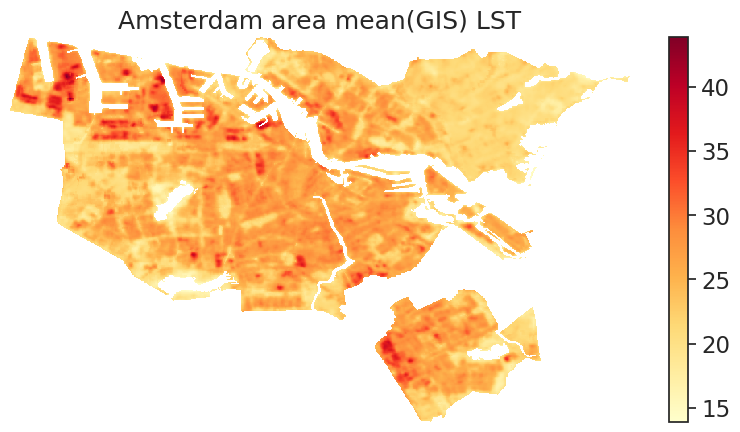

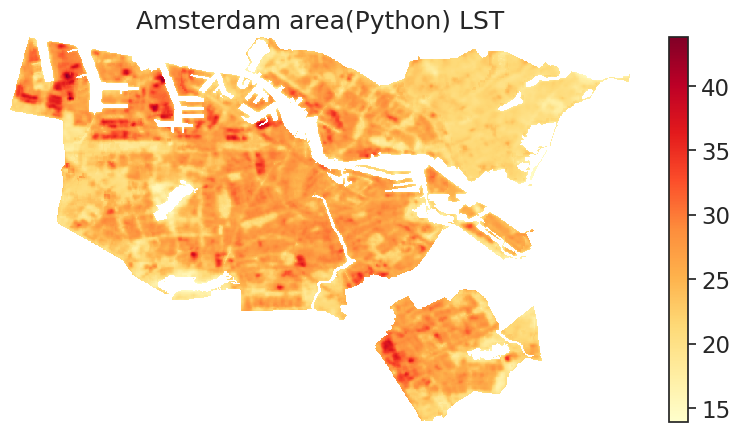

(567, 771)

In [104]:
python_mean = rxr.open_rasterio('data/python_mean.tif', masked= True).squeeze()
mean = rxr.open_rasterio('data/mean.tif', masked = True).squeeze()

mean_celcius = calculate_lst(mean)

#plot raster 
f, ax = plt.subplots(figsize=(10, 5))
python_mean.plot.imshow(cmap = 'YlOrRd')
ax.set(title="Amsterdam area mean(GIS) LST")

ax.set_axis_off()
plt.show()

#plot raster 
f, ax = plt.subplots(figsize=(10, 5))
mean_celcius.plot.imshow(cmap = 'YlOrRd')
ax.set(title="Amsterdam area(Python) LST")

ax.set_axis_off()
plt.show()

mean_celcius.rio.to_raster('data/mean_celcius.tif')
mean_celcius.shape